In [1]:
import pandas as pd

df_anc= pd.read_feather("../data/make_data/df_anc_for_model.feather")

In [2]:
df_anc.columns

Index(['전용면적', '면적코드', '전용면적별세대수', '세대수', '사용승인일자', '동수', '건물구조', '승강기수',
       '교차집계구총인구수', '교차집계구생산인구수', '교차집계구유소년인구수', '교차집계구노년인구수', '인구밀도',
       '인구밀도지표', '총부양비', '유소년부양비', '노년부양비', '노령화지수', '연령구조지표', '지하철역까지_거리',
       '호선', '공원수', '공원총면적', '환경생활지수', '환경평가점수', '차량접근가능시설수', '5분_car',
       '10분_car', '15분_car', '20분_car', '25분_car', '30분_car', '도보접근가능시설수',
       '5분_walk', '10분_walk', '15분_walk', '20분_walk', '25분_walk', '30분_walk',
       '자치구명', '교차집계구생산인구수 변화량', '교차집계구총인구수 변화량', '교차집계구유소년인구수 변화량',
       '교차집계구노년인구수 변화량', '인구밀도 변화량', '인구밀도지표 변화량', '총부양비 변화량', '유소년부양비 변화량',
       '노년부양비 변화량', '노령화지수 변화량', '연령구조지표 변화량', '인근-단지 경사도 평균값',
       '인근-단지 경사도 최고값', '인근-단지 경사도 최저값', '인근-단지 표고 평균값', '인근-단지 표고 최저값',
       '인근-단지 표고 최고값', 'target', '아파트명'],
      dtype='object')

In [3]:
df_anc.groupby("자치구명")['target'].mean().sort_values(ascending=False)

자치구명
종로구     -6.318530
용산구     -7.209797
서초구     -7.727133
관악구     -8.640438
중구      -8.820737
은평구     -8.969866
금천구     -9.150679
구로구     -9.758738
성동구    -10.421867
중랑구    -10.760495
광진구    -10.933192
강남구    -11.118499
강북구    -11.268266
서대문구   -11.404448
강서구    -11.436261
마포구    -12.118483
양천구    -12.449637
강동구    -12.861612
동대문구   -13.177725
동작구    -13.322477
영등포구   -14.082651
송파구    -15.127087
성북구    -16.052615
도봉구    -16.494433
노원구    -17.182215
Name: target, dtype: float64

## **가격이 많이 떨어진 아파트의 세대수의 크기를 시각화**

In [4]:
df_anc['target'].min()

-41.64

In [5]:
df_anc['target'].max()

50.51

<Axes: xlabel='세대수', ylabel='target'>

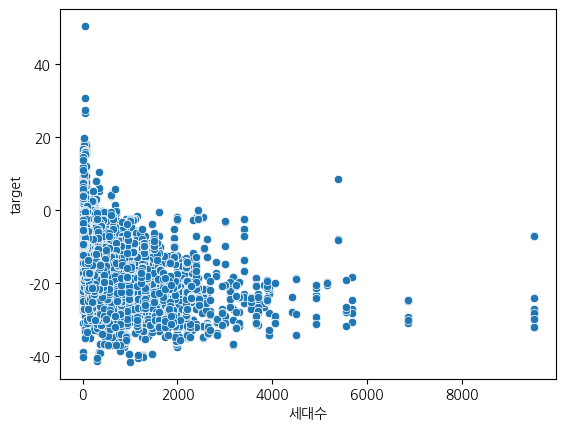

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings(action='ignore')


sns.scatterplot(data=df_anc, x='세대수', y='target')

In [13]:
sns.kdeplot(df_anc['target'], hue=df_anc['자치구명'])

ValueError: The following variable cannot be assigned with wide-form data: `hue`

<Axes: xlabel='target', ylabel='Count'>

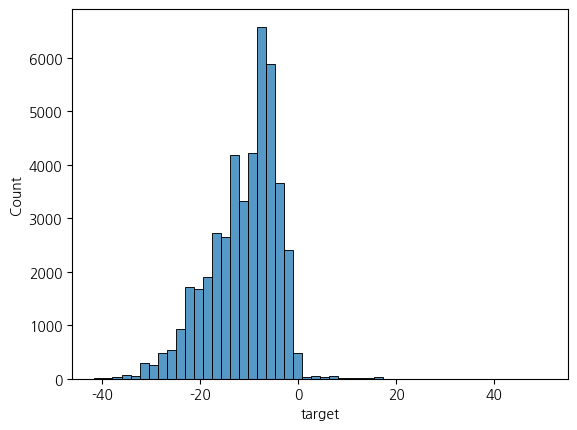

In [10]:
sns.histplot(data= df_anc, x='target', bins=50)

In [8]:
import numpy as np

df_anc_top = df_anc[df_anc['target']>df_anc['target'].quantile(0.75)].copy()
df_anc_bot = df_anc[df_anc['target']<df_anc['target'].quantile(0.25)].copy()

df_anc_top['class'] = 'top'
df_anc_bot['class'] = 'bot'

df_anc_class = pd.concat([df_anc_top, df_anc_bot]).copy()

In [9]:
df_anc_class['class'].value_counts()

top    11053
bot    11051
Name: class, dtype: int64

<Axes: xlabel='세대수', ylabel='target'>

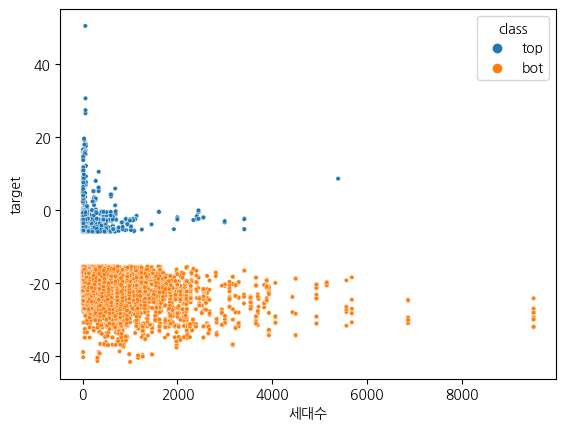

In [11]:
sns.scatterplot(data=df_anc_class, x='세대수', y='target', hue='class', s=10)

In [15]:
(df_anc_top['세대수'] <= 1800).sum()

10943

In [14]:
(df_anc_bot['세대수'] <= 1800).sum()

10172

In [13]:
(df_anc_bot['세대수'] >= 1800).sum()

857

In [12]:
(df_anc_top['세대수'] >= 1800).sum()

38